In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib.pyplot import imread
import cv2
import random
import os 
from os import listdir
from PIL import Image
from sklearn.preprocessing import label_binarize, LabelBinarizer
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array, array_to_img
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D
from keras.layers import Activation, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split
from keras.models import model_from_json
from keras.utils import to_categorical



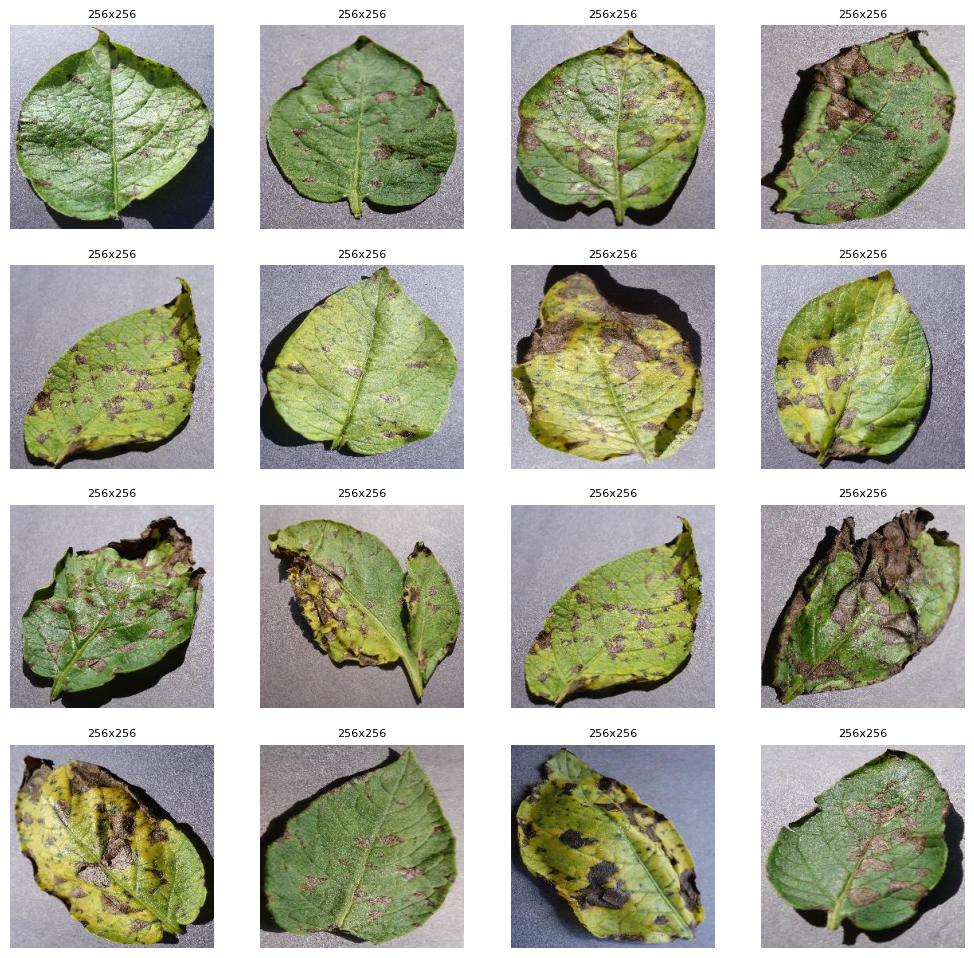

In [3]:
path = r'C:\Users\MR.CRIMINAL\Documents\Projects\4- Projects\Plant_images_pianalytix\Potato___Early_blight'

# Only select image files (e.g., jpg, png)
image_files = [f for f in os.listdir(path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Plot random images
plt.figure(figsize=(10, 10))
for i in range(1, 17):  # 4x4 grid
    plt.subplot(4, 4, i)
    plt.tight_layout()
    
    img_path = os.path.join(path, random.choice(image_files))
    rand_img = imread(img_path)
    plt.imshow(rand_img)
    plt.axis('off')
    plt.title(f'{rand_img.shape[1]}x{rand_img.shape[0]}', fontsize=8)

plt.show()


In [4]:
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, (256,256))
            return img_to_array(image)
        else :
            return np.array([])
    except Excetion as e:
        print(f"Error :{e}")
        return None

In [5]:
dir = r"C:\Users\MR.CRIMINAL\Documents\Projects\4- Projects\Plant_images_pianalytix"
root_dir = listdir(dir)
image_list, label_list = [],[]
all_labels = ['Corn-common_rust', 'Patato-Early_blight', 'Tomato-Bacterial_spot']
binary_labels = [0,1,2]
temp = -1

for directory in root_dir:
    plant_image_list = listdir(f"{dir}/{directory}")
    temp += 1
    for files in plant_image_list :
        image_path = f"{dir}/{directory}/{files}"
        image_list.append(convert_image_to_array(image_path))
        label_list.append(binary_labels[temp])
        

In [6]:
label_counts = pd.Series(label_list).value_counts()
print(label_counts.head())

0    300
1    300
2    300
Name: count, dtype: int64


In [7]:
image_list[0].shape

(256, 256, 3)

In [8]:
label_list = np.array(label_list)
label_list.shape

(900,)

In [9]:
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size = 0.2, random_state = 10)


In [10]:
x_train = np.array(x_train, dtype=np.float16) / 225.0
x_test = np.array(x_test, dtype = np.float16) / 225.0
x_train = x_train.reshape(-1, 256,256,3)
x_test = x_test.reshape(-1,256,256,3)


In [11]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [12]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3,3), padding="same", input_shape=(256,256,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Conv2D(64, (3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))  # Fixed typo here
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dense(3, activation="softmax"))  # 3 output classes
model.summary()


C:\Users\MR.CRIMINAL\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 256, 256, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 85, 85, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 85, 85, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 42, 42, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 112896)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       7,225,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,244,995 (27.64 MB)

 Trainable params: 7,244,995 (27.64 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0001), metrics = ['accuracy'])

In [18]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2)

In [23]:
epochs = 10
batch_size = 128
history = model.fit(x_train, y_train, batch_size= batch_size, epochs = epochs,
                    validation_data = (x_val, y_val))

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 24s 4s/step - accuracy: 1.0000 - loss: 0.0025 - val_accuracy: 1.0000 - val_loss: 0.0128
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 1.0000 - loss: 0.0023 - val_accuracy: 1.0000 - val_loss: 0.0128
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 26s 4s/step - accuracy: 1.0000 - loss: 0.0022 - val_accuracy: 1.0000 - val_loss: 0.0119
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step - accuracy: 1.0000 - loss: 0.0021 - val_accuracy: 1.0000 - val_loss: 0.0116
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step - accuracy: 1.0000 - loss: 0.0021 - val_accuracy: 1.0000 - val_loss: 0.0118
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 1.0000 - val_loss: 0.0110
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 1.0000 - val_loss: 0.0107
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 22s 4s/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 1.0000 - val_loss: 0.0111
Epoch 9/

In [25]:
model.save("plant_disease.h5")

json_model = model.to_json()

with open('plant_model.json', 'w') as json_file:
    json_file.write(json_model)
    
model.save_weights('plant_model.weights.h5')


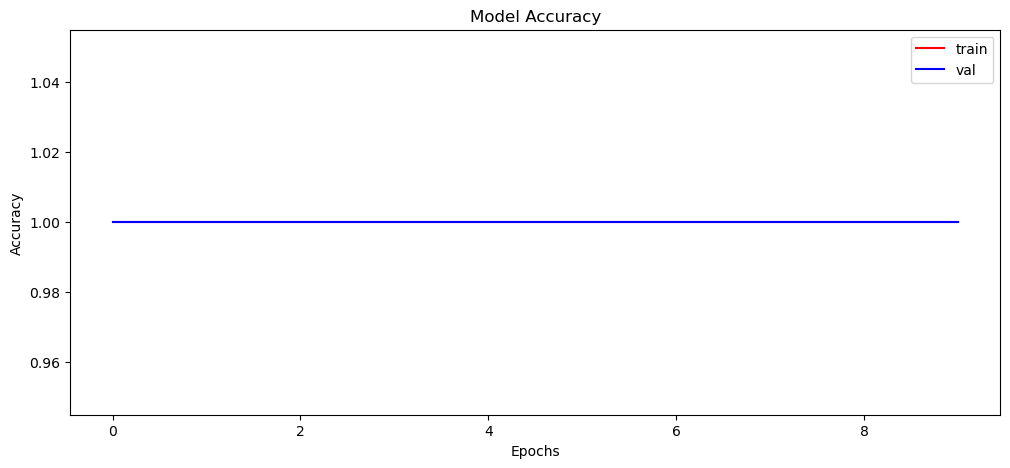

In [28]:
plt.figure(figsize = (12,5))
plt.plot(history.history['accuracy'], color = 'r')
plt.plot(history.history['val_accuracy'], color= 'b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])

plt.show()

In [29]:
print(history.history.keys())
print(history.history['accuracy'])
print(history.history['val_accuracy'])


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


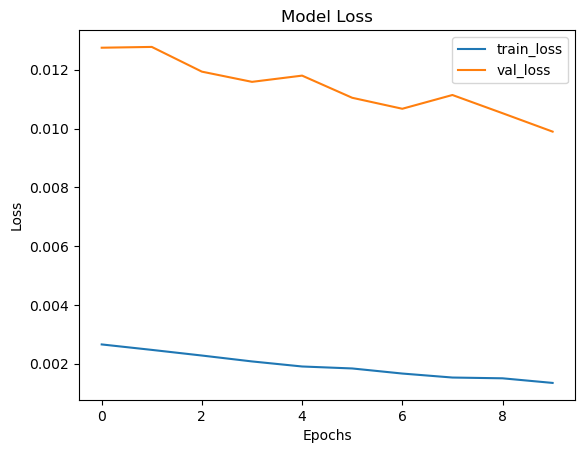

In [30]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


In [31]:
print(len(x_train), len(y_train))
print(len(x_val), len(y_val))


576 576
144 144


In [32]:
print("[INFO] Calculating model accuracy ")
score = model.evaluate(x_test, y_test)
print(f"Test Accuracy : {score[1]+100}")


[INFO] Calculating model accuracy 
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 188ms/step - accuracy: 0.9975 - loss: 0.0090
Test Accuracy : 100.99444442987442


In [33]:
y_pred = model.predict(x_test)


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 213ms/step


In [35]:
image = array_to_img(x_test[10])
img


NameError: name 'img' is not defined

In [36]:
print("Originally : ", all_labels[np.argmax(y_test[10])])
print("Predicted : ", all_labels[np.argmax(y_pred[10])])


Originally :  Patato-Early_blight
Predicted :  Patato-Early_blight
